In [6]:
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(tidyverse) # metapackage of all tidyverse packages
library(DT)
library(scales)

In [29]:
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")
colors

[1] "#CC1011" "#665555" "#05a399" "#cfcaca" "#f5e840" "#0683c9" "#e075b0"

In [37]:
# Read the data for each month separately 
apr <- read.csv("/kaggle/input/uber-data/Uber-dataset/uber-raw-data-apr14.csv")
may <- read.csv("/kaggle/input/uber-data/Uber-dataset/uber-raw-data-may14.csv")
june <- read.csv("/kaggle/input/uber-data/Uber-dataset/uber-raw-data-jun14.csv")
july <- read.csv("/kaggle/input/uber-data/Uber-dataset/uber-raw-data-jul14.csv")
aug <- read.csv("/kaggle/input/uber-data/Uber-dataset/uber-raw-data-aug14.csv")
sept <- read.csv("/kaggle/input/uber-data/Uber-dataset/uber-raw-data-sep14.csv")

# Combine the data together 
data <- rbind(apr, may, june, july, aug, sept)
cat("The dimensions of the data are:", dim(data))

The dimensions of the data are: 4534327 4

In [38]:
# Print the first 6 rows of the data
head(data)

,Date.Time,Lat,Lon,Base
,<chr>,<dbl>,<dbl>,<chr>
1,4/1/2014 0:11:00,40.7690,-73.9549,B02512
2,4/1/2014 0:17:00,40.7267,-74.0345,B02512
3,4/1/2014 0:21:00,40.7316,-73.9873,B02512
4,4/1/2014 0:28:00,40.7588,-73.9776,B02512
5,4/1/2014 0:33:00,40.7594,-73.9722,B02512
6,4/1/2014 0:33:00,40.7383,-74.0403,B02512


In [39]:
data$Date.Time <- as.POSIXct(data$Date.Time, format="%m/%d/%Y %H:%M:%S")
data$Time <- format(as.POSIXct(data$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
data$Date.Time <- ymd_hms(data$Date.Time)

Warning message:
“ 2211 failed to parse.”


In [40]:
# Create individual columns for month day and year
data$day <- factor(day(data$Date.Time))
data$month <- factor(month(data$Date.Time, label=TRUE))
data$year <- factor(year(data$Date.Time))
data$dayofweek <- factor(wday(data$Date.Time, label=TRUE))

In [41]:
# Add Time variables as well 
data$second = factor(second(hms(data$Time)))
data$minute = factor(minute(hms(data$Time)))
data$hour = factor(hour(hms(data$Time)))

In [42]:
# Look at the data
head(data)

,Date.Time,Lat,Lon,Base,Time,day,month,year,dayofweek,second,minute,hour
,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<ord>,<fct>,<ord>,<fct>,<fct>,<fct>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,Apr,2014,Tue,0,11,0
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,Apr,2014,Tue,0,17,0
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,Apr,2014,Tue,0,21,0
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,Apr,2014,Tue,0,28,0
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,Apr,2014,Tue,0,33,0
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,1,Apr,2014,Tue,0,33,0


In [43]:
hourly_data <- data %>% 
                    group_by(hour) %>% 
                            dplyr::summarize(Total = n())

# Shos data in a searchable js table
datatable(hourly_data)

HTML widgets cannot be represented in plain text (need html)

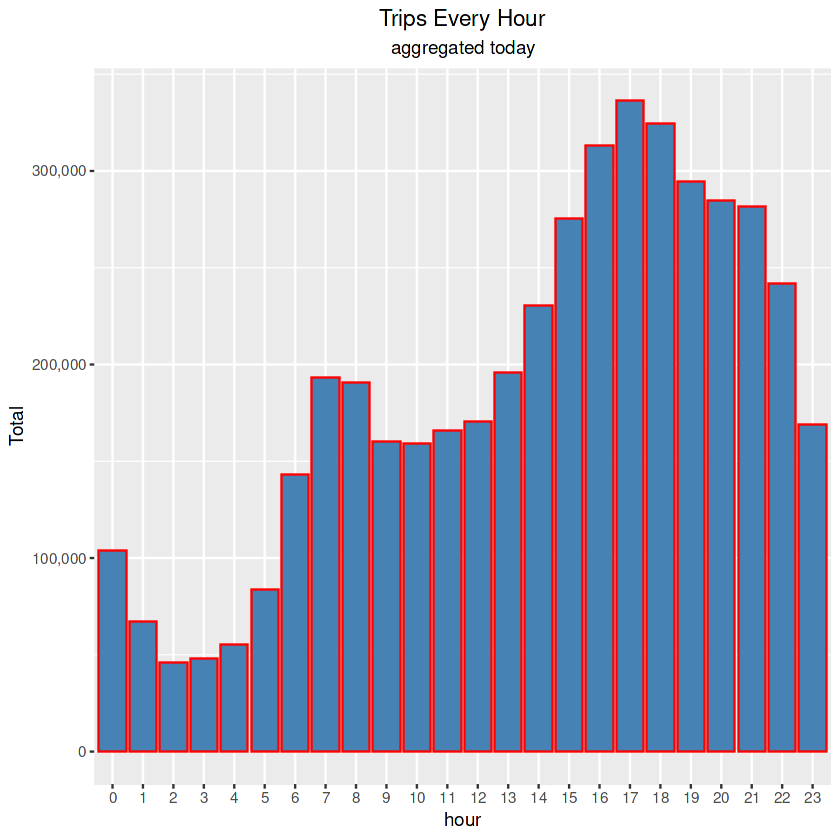

In [44]:
# Plot the data by hour
ggplot(hourly_data, aes(hour, Total)) + 
geom_bar(stat="identity", 
         fill="steelblue", 
         color="red") + 
ggtitle("Trips Every Hour", subtitle = "aggregated today") + 
theme(legend.position = "none", 
      plot.title = element_text(hjust = 0.5), 
      plot.subtitle = element_text(hjust = 0.5)) + 
scale_y_continuous(labels=comma)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


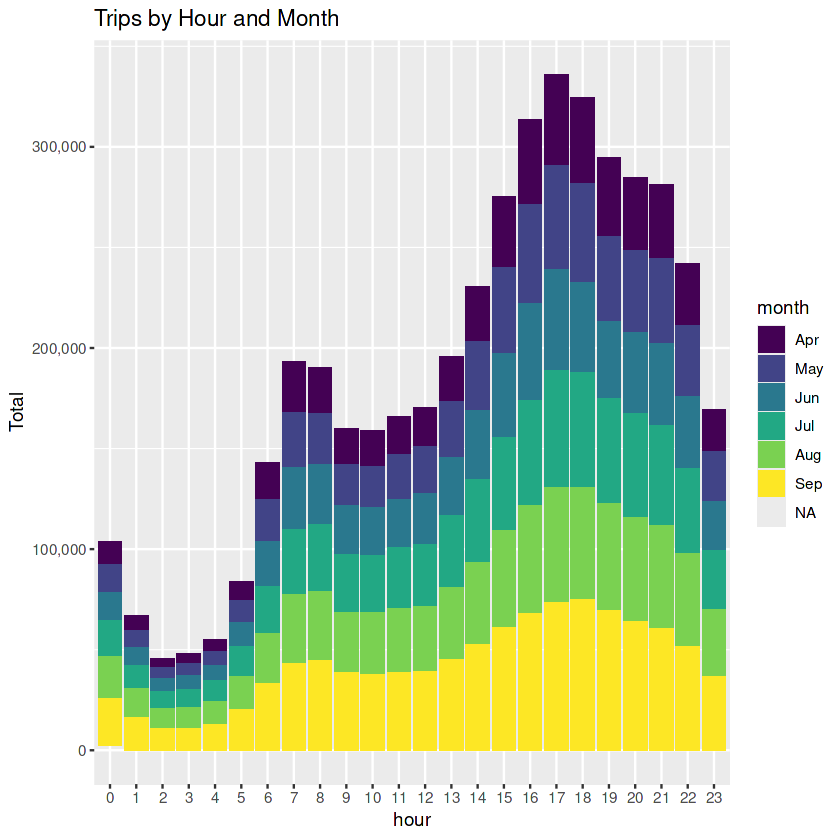

In [45]:
# Aggregate the data by month and hour
month_hour_data <- data %>% group_by(month, hour) %>%  dplyr::summarize(Total = n())

ggplot(month_hour_data, aes(hour, Total, fill=month)) + 
geom_bar(stat = "identity") + 
ggtitle("Trips by Hour and Month") + 
scale_y_continuous(labels = comma)

In [46]:
# Aggregate data by day of the month 
day_data <- data %>% group_by(day) %>% dplyr::summarize(Trips = n())
day_data

day,Trips
<fct>,<int>
1,127360
2,143146
3,142914
4,140869
5,146970
6,139800
7,143422
8,145932
9,155077


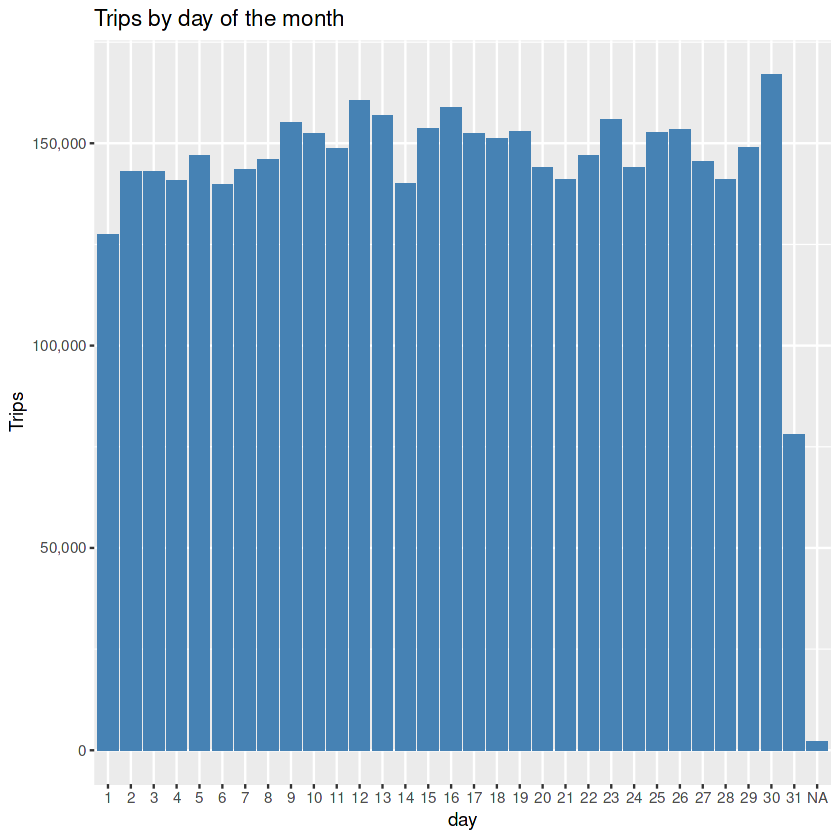

In [47]:
# Plot the data for the day
ggplot(day_data, aes(day, Trips)) + 
geom_bar(stat = "identity", fill = "steelblue") +
ggtitle("Trips by day of the month") + 
theme(legend.position = "none") + 
scale_y_continuous(labels = comma)

In [48]:
# Collect data by day of the week and month

day_month_data <- data %>% group_by(dayofweek, month) %>% dplyr::summarize(Trips = n())
day_month_data

`summarise()` has grouped output by 'dayofweek'. You can override using the
`.groups` argument.


dayofweek,month,Trips
<ord>,<ord>,<int>
Sun,Apr,51162
Sun,May,56084
Sun,Jun,79560
Sun,Jul,76251
Sun,Aug,110131
Sun,Sep,116390
Mon,Apr,60848
Mon,May,63826
Mon,Jun,94640


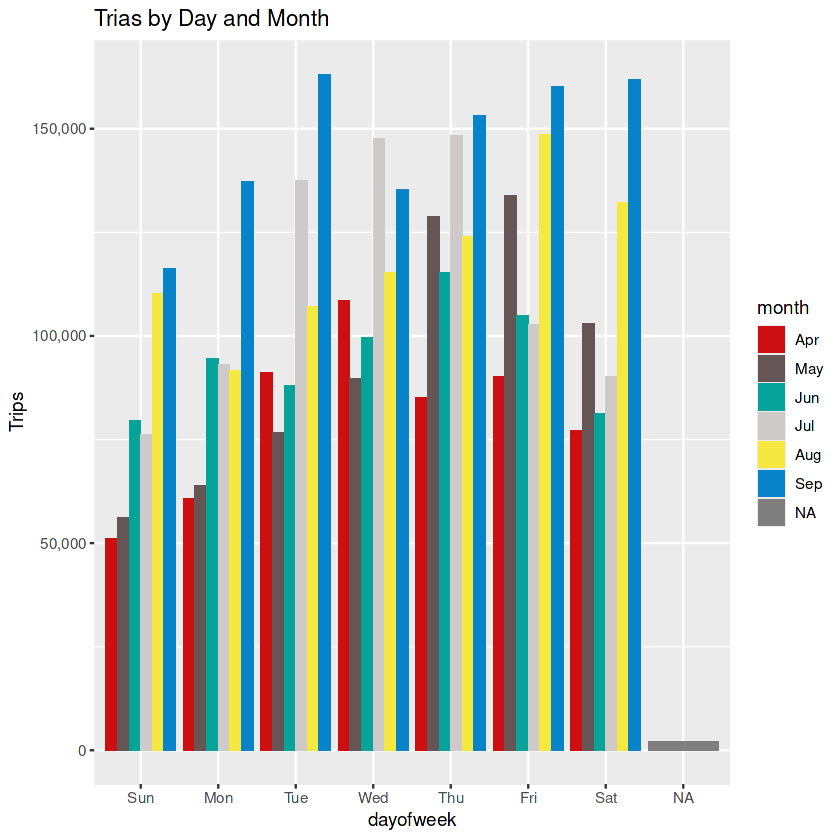

In [49]:
# Plot the above data
ggplot(day_month_data, aes(dayofweek, Trips, fill = month)) + 
geom_bar(stat = "identity", aes(fill = month), position = "dodge") + 
ggtitle("Trias by Day and Month") + 
scale_y_continuous(labels = comma) + 
scale_fill_manual(values = colors)

In [50]:
month_data <- data %>% group_by(month) %>% dplyr::summarize(Total = n())

month_data

month,Total
<ord>,<int>
Apr,564264
May,652124
Jun,663545
Jul,795732
Aug,828805
Sep,1027646
NA,2211


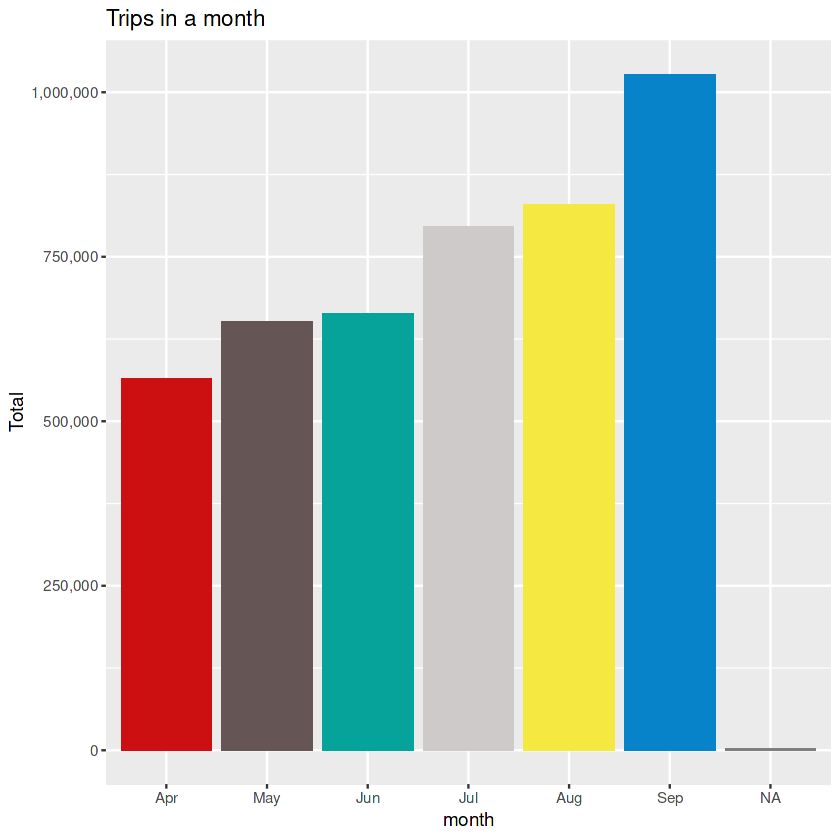

In [51]:
ggplot(month_data, aes(month, Total, fill = month)) + 
geom_bar(stat = "Identity") + 
ggtitle("Trips in a month") + 
theme(legend.position = "none") + 
scale_y_continuous(labels = comma) + 
scale_fill_manual(values = colors)

In [52]:
day_hour_data <- data %>% group_by(day, hour) %>% dplyr::summarize(Total = n())
datatable(day_hour_data)

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


HTML widgets cannot be represented in plain text (need html)

In [53]:
day_hour_data <- data %>% group_by(day, hour) %>% dplyr::summarize(Total = n())
datatable(day_hour_data)

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


HTML widgets cannot be represented in plain text (need html)

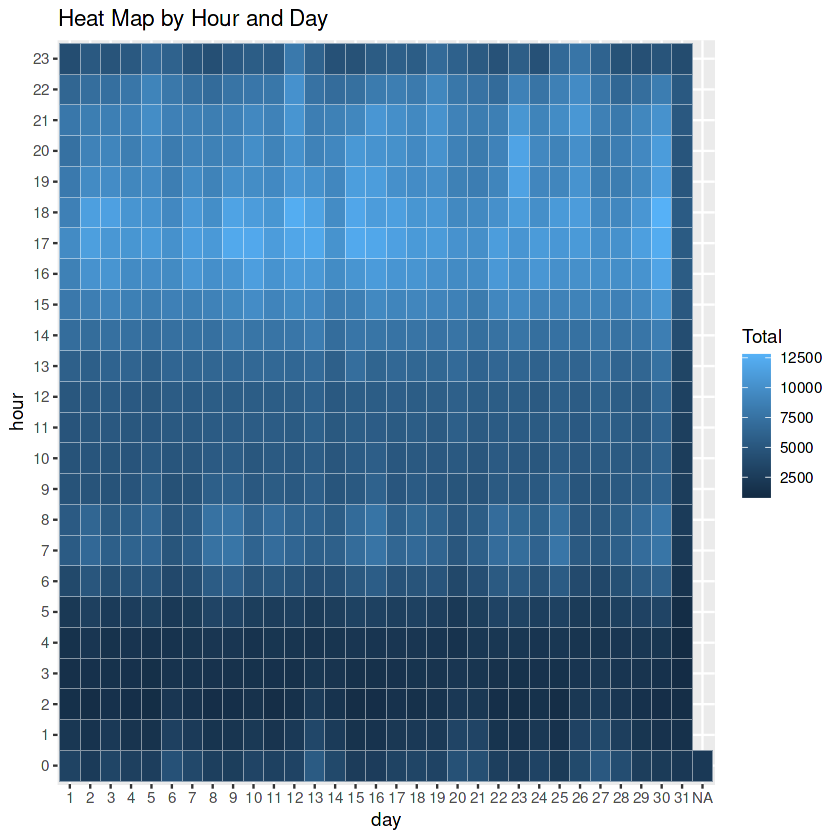

In [54]:
# Plot a heatmap 

ggplot(day_hour_data, aes(day, hour, fill = Total)) + 
geom_tile(color = "white") + 
ggtitle("Heat Map by Hour and Day")

In [55]:
# Collect data by month and day

month_day_data <- data %>% group_by(month, day) %>% dplyr::summarize(Trips = n())
month_day_data

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,day,Trips
<ord>,<fct>,<int>
Apr,1,14543
Apr,2,17469
Apr,3,20697
Apr,4,26707
Apr,5,19506
Apr,6,13415
Apr,7,19547
Apr,8,16188
Apr,9,16837


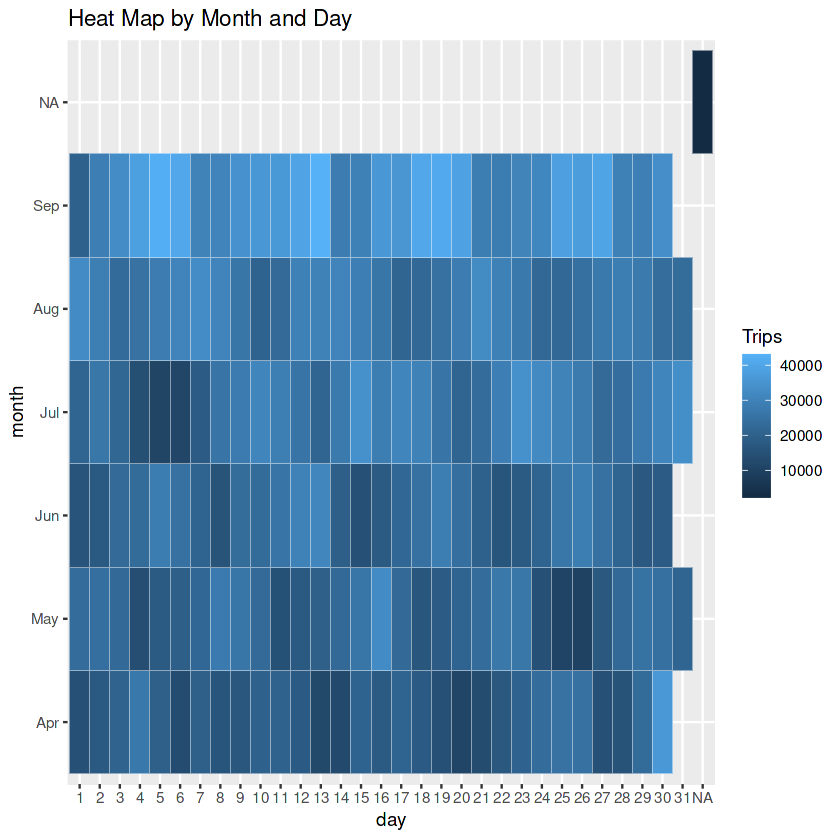

In [56]:
# Plot a heatmap 

ggplot(month_day_data, aes(day, month, fill = Trips)) + 
geom_tile(color = "white") + 
ggtitle("Heat Map by Month and Day")

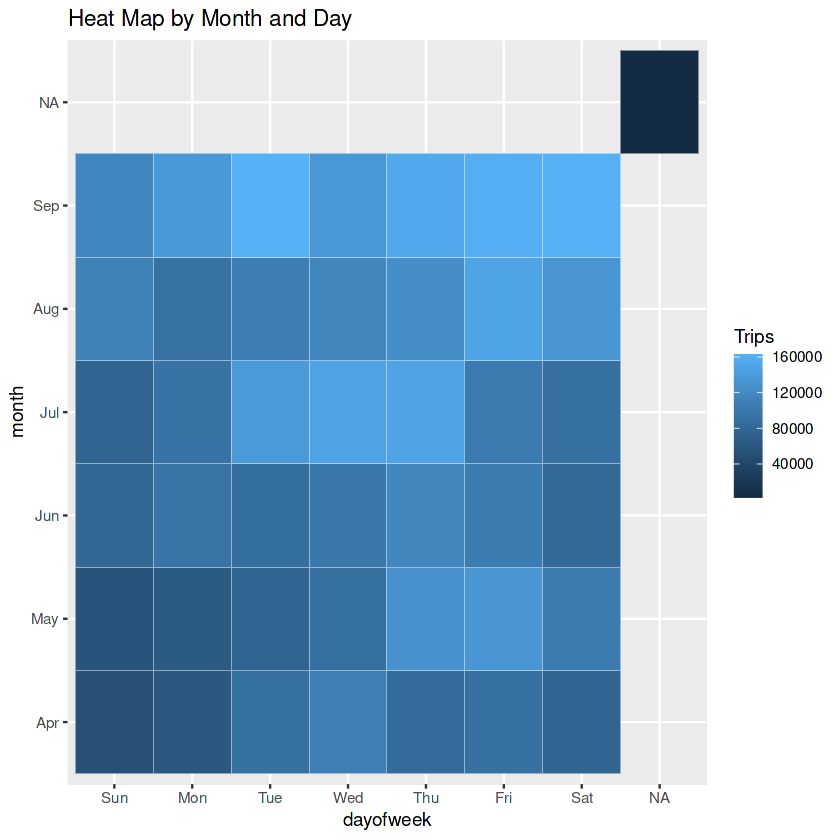

In [57]:
# Plot a heatmap by day of the week and month

ggplot(day_month_data, aes(dayofweek, month, fill = Trips)) + 
geom_tile(color = "white") + 
ggtitle("Heat Map by Month and Day")

In [58]:
# Set Map Constants
min_lat <- 40 
max_lat <- 40.91
min_long <- -74.15
max_long <- -73.7004

Warning message:
“Removed 70180 rows containing missing values or values outside the scale range
(`geom_point()`).”


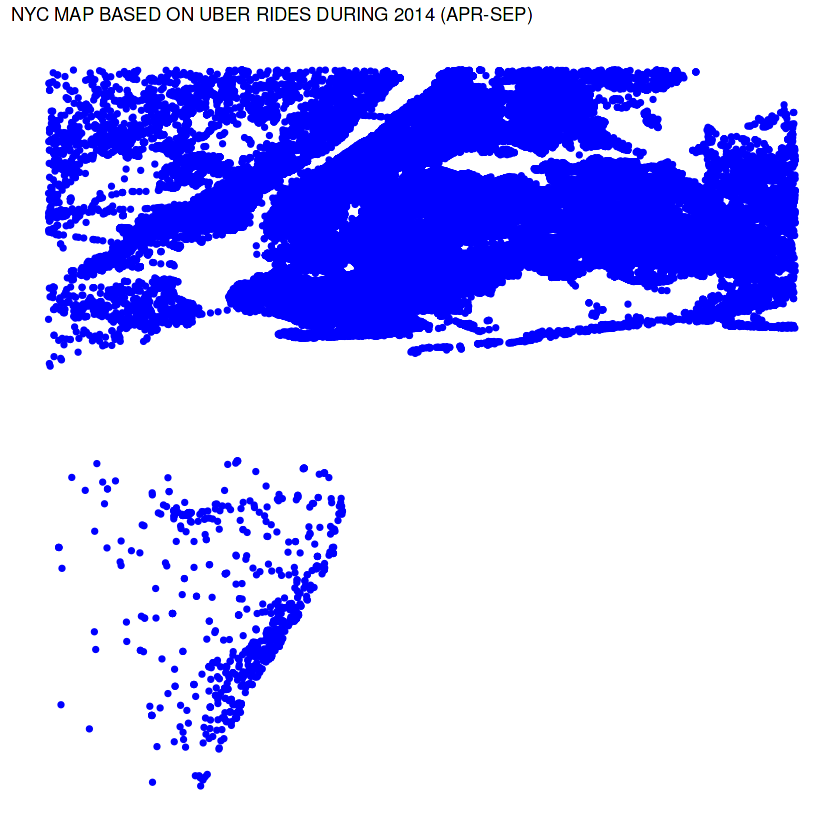

In [59]:
ggplot(data, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "blue") +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() +
           ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")